In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

In [2]:
def plotAudio3(sig,sampleRate,title):
    
    time=np.arange(0,sig.shape[0])/sr
    
    excursion=max(abs(sig))
    sigNew = sig / excursion

    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [3]:
def subplots(plotPos,title,data,color,ylabel,xlabel):
    plt.subplot(plotPos[0],plotPos[1],plotPos[2])
    plt.title(title)
    plt.plot(data,color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [4]:
def makeEchoes(sig,sr,sec,echoes):


    offset=np.int(sr*sec)

    ending = np.zeros((offset*(len(echoes))))
    
    delayedSig = np.concatenate((sig,ending))
    
    for i in range(len(echoes)):
        
      
        beginning = np.zeros(offset*(i+1))
        
        delay = np.concatenate((beginning,sig))
        delay = delay * echoes[i]

      
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))
        
     
        delayedSig = delayedSig + delay
    
    return delayedSig

In [5]:
def amplitudeModulation(carrier,modulatorFreq,modulatorAmp,modIndex):
    timeSeries = np.linspace(0, 1, len(carrier))
    modulator = modulatorAmp * np.cos (2 * np.pi * modulatorFreq * timeSeries)
    product = (1 + modIndex * modulator) * carrier
    
    subplots([3,1,1],'Amplitude Modulation',modulator,'g','Amplitude','Modulator signal')
    subplots([3,1,2],'Amplitude Modulation',carrier,'r','Amplitude','Carrier signal')
    subplots([3,1,3],'Amplitude Modulation',product,'purple','Amplitude','AM signal')
    
    plt.subplots_adjust(hspace=1)
    plt.rc('font', size=15)
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    
    return product

In [50]:
def echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex):
    
    plotAudio3(sig,sr,'Original Signal')
    
    echoSig = makeEchoes(sig,sr,0.5,echoes)
        
    plotAudio3(echoSig,sr,'Delayed Signal')
    
    modSignal = amplitudeModulation(echoSig,modulatorFreq,modulatorAmp,modIndex)
         
    
    return modSignal

In [51]:
sig , sr = librosa.load('avm.wav')
IPython.display.Audio(data=sig, rate=sr)

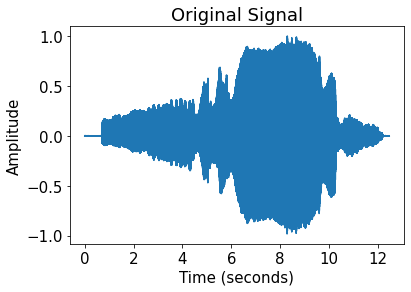

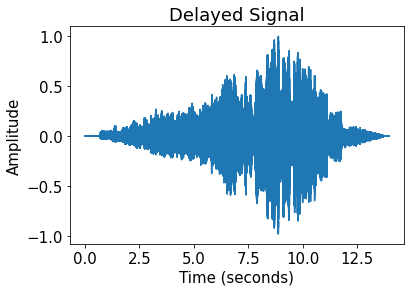

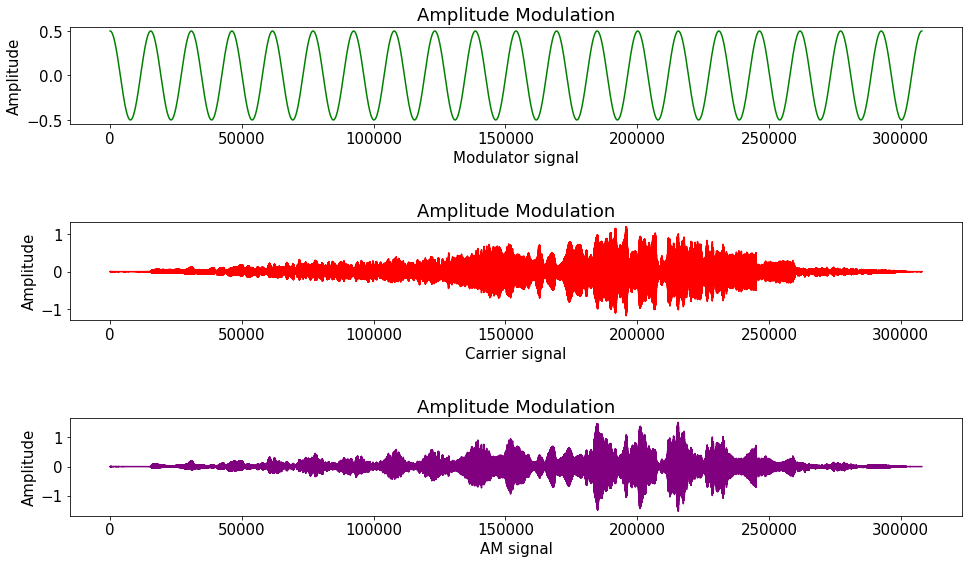

In [55]:
delay = 0.5
echoes = [1,1,1]
modulatorFreq = 20
modulatorAmp = 0.5
modIndex = 1

modSignal1 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
IPython.display.Audio(data=modSignal1, rate=sr)

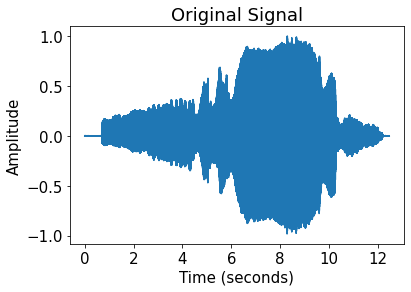

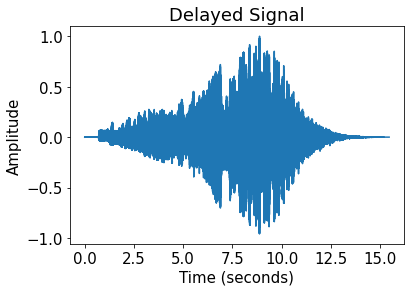

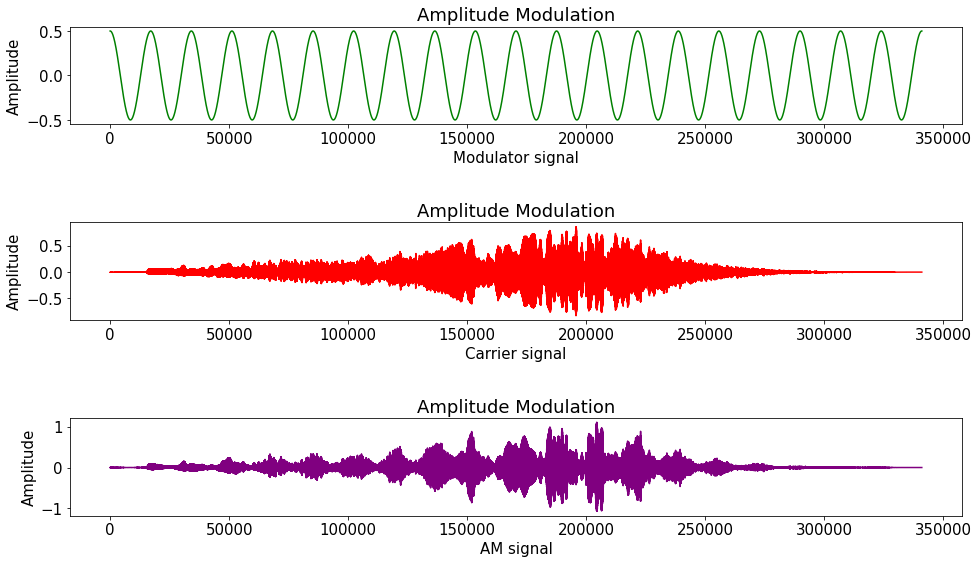

In [53]:
delay = 0.5
echoes = [1.0,0.5,0.25,0.125,0.0625,0.03125]
modulatorFreq = 20
modulatorAmp = 0.5
modIndex = 1

modSignal2 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
IPython.display.Audio(data=modSignal2, rate=sr)

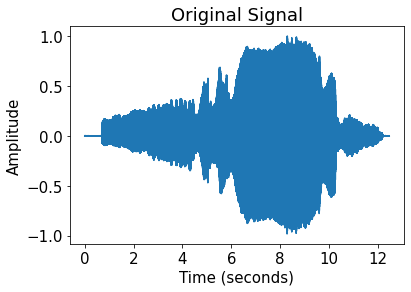

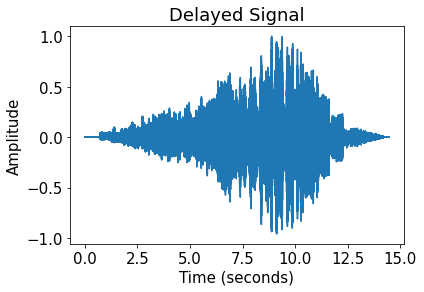

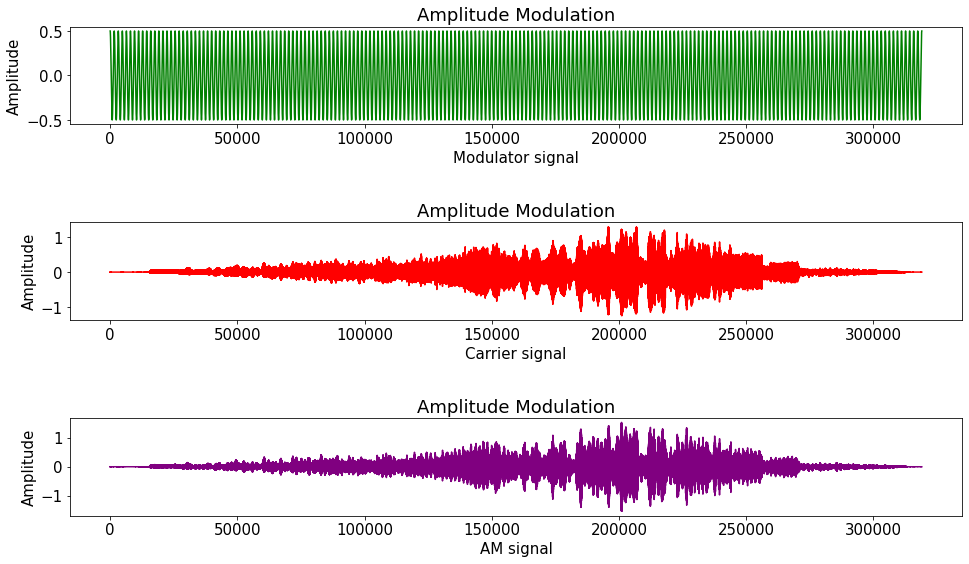

In [56]:
delay = 0.5
echoes = [1,1,1,1]
modulatorFreq = 200
modulatorAmp = 0.5
modIndex = 0.5

modSignal3 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
IPython.display.Audio(data=modSignal3, rate=sr)

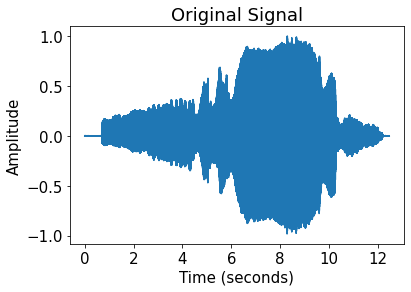

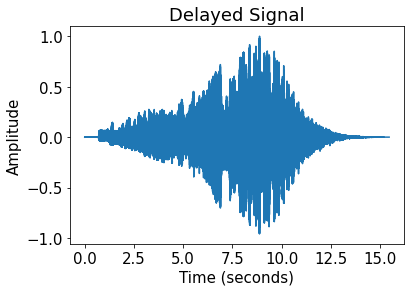

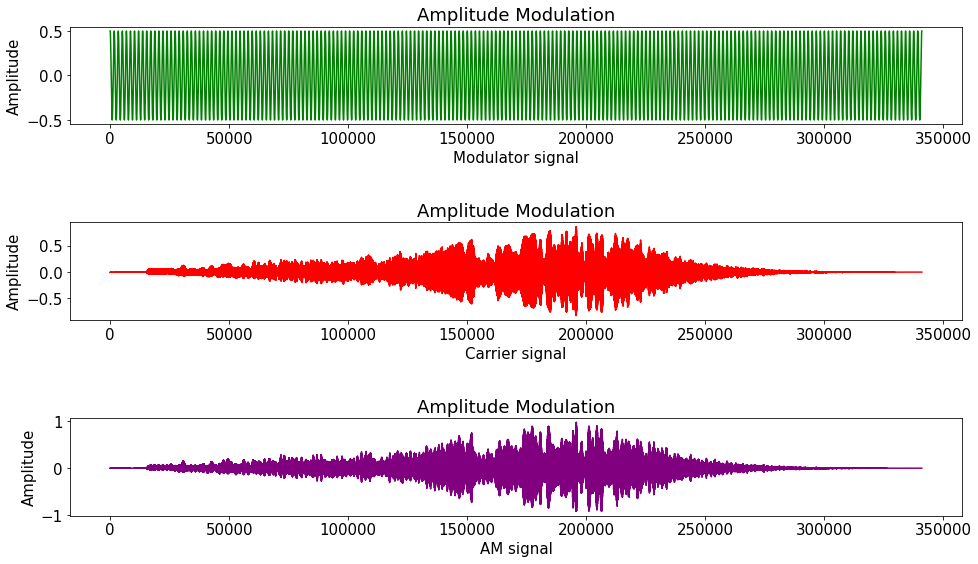

In [57]:
delay = 0.5
echoes = [1.0,0.5,0.25,0.125,0.0625,0.03125]
modulatorFreq = 200
modulatorAmp = 0.5
modIndex = 0.5

modSignal4 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
IPython.display.Audio(data=modSignal4, rate=sr)

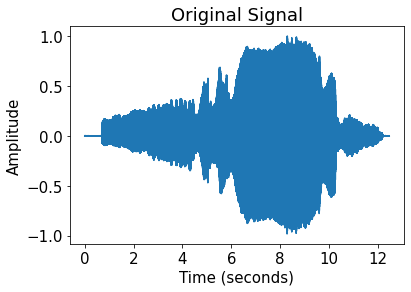

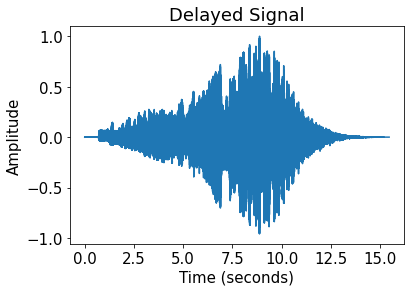

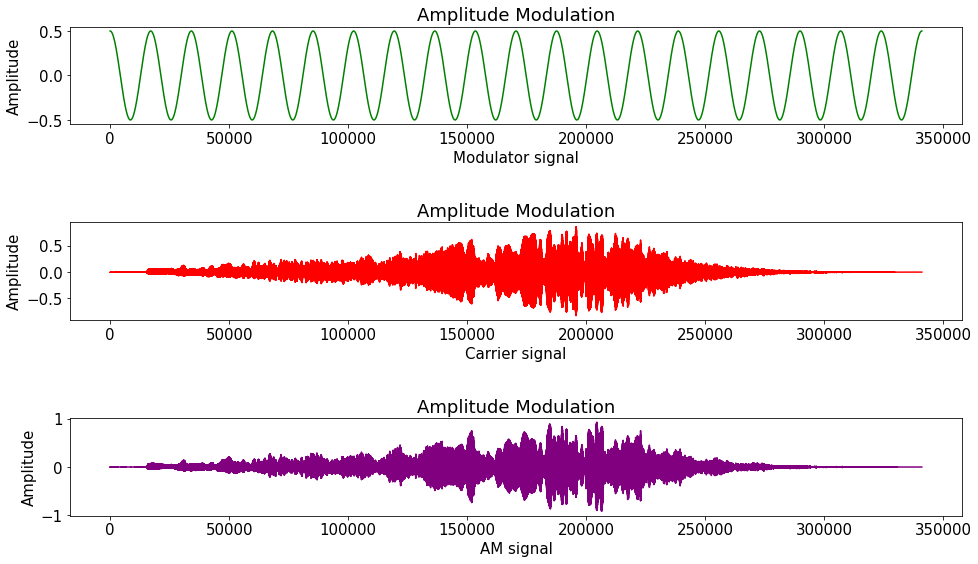

In [58]:
delay = 1.0
echoes = [1.0,0.5,0.25,0.125,0.0625,0.03125]
modulatorFreq = 20
modulatorAmp = 0.5
modIndex = 0.5

modSignal5 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
IPython.display.Audio(data=modSignal5, rate=sr)

In [ ]:
delay = 0.5
echoes = [1.0,0.5,0.25,0.125,0.0625,0.03125]
modulatorFreq = 200
modulatorAmp = 1.0
modIndex = 0.5

modSignal4 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
IPython.display.Audio(data=modSignal4, rate=sr)